In [5]:
import numpy
import ga

In [6]:


"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)


[[ 0.66405185  2.62200679  0.75286893 -1.0356602   3.05640563  0.96651415]
 [-0.80703755 -0.54946992  1.85932483 -2.60453289 -1.95704353  3.57661935]
 [-2.93057346 -2.040746    2.71430257  0.24122029  0.43339161  1.24415044]
 [ 2.23417076 -1.04753012 -2.99983236  3.84401208  3.34653741  0.59149627]
 [ 2.88504826  0.98506044  2.18550862  3.49122267  1.21654632  3.50387643]
 [-0.71115463 -2.58616593  1.33397672 -2.26704021 -2.18839587  2.04784243]
 [-1.80479262 -3.66068133  2.4088483   3.77148866  1.20538957 -0.23454265]
 [ 1.29034893 -1.72891709 -2.71131689 -3.59685352  0.30375096  2.41325986]]


In [7]:


best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    

Generation :  0
Fitness
[-43.29414427  -3.92687006  -7.54945617 -19.83955355   4.82523697
  10.10892595  15.23366977 -33.53822878]
Best result :  15.23366977073287
Parents
[[-1.80479262 -3.66068133  2.4088483   3.77148866  1.20538957 -0.23454265]
 [-0.71115463 -2.58616593  1.33397672 -2.26704021 -2.18839587  2.04784243]
 [ 2.88504826  0.98506044  2.18550862  3.49122267  1.21654632  3.50387643]
 [-0.80703755 -0.54946992  1.85932483 -2.60453289 -1.95704353  3.57661935]]
Crossover
[[-1.80479262 -3.66068133  2.4088483  -2.26704021 -2.18839587  2.04784243]
 [-0.71115463 -2.58616593  1.33397672  3.49122267  1.21654632  3.50387643]
 [ 2.88504826  0.98506044  2.18550862 -2.60453289 -1.95704353  3.57661935]
 [-0.80703755 -0.54946992  1.85932483  3.77148866  1.20538957 -0.23454265]]
Mutation
[[-1.80479262 -3.66068133  1.73311482 -2.26704021 -2.18839587  1.94323483]
 [-0.71115463 -2.58616593  1.6766362   3.49122267  1.21654632  2.62765606]
 [ 2.88504826  0.98506044  1.32062598 -2.60453289 -1.9570

 [-1.80479262 -3.66068133  7.21150456  3.77148866  1.20538957 -7.45732646]]
Generation :  22
Fitness
[60.13499618 59.53690859 59.15749177 55.88020086 60.75299891 54.89603114
 60.58609837 65.99005057]
Best result :  65.99005056919987
Parents
[[-1.80479262 -3.66068133  7.21150456  3.77148866  1.20538957 -7.45732646]
 [-1.80479262 -3.66068133  6.52647886  3.77148866  1.20538957 -6.85318567]
 [-1.80479262 -3.66068133  7.65305507  3.77148866  1.20538957 -5.97873518]
 [-1.80479262 -3.66068133  6.72041341  3.77148866  1.20538957 -6.57727638]]
Crossover
[[-1.80479262 -3.66068133  7.21150456  3.77148866  1.20538957 -6.85318567]
 [-1.80479262 -3.66068133  6.52647886  3.77148866  1.20538957 -5.97873518]
 [-1.80479262 -3.66068133  7.65305507  3.77148866  1.20538957 -6.57727638]
 [-1.80479262 -3.66068133  6.72041341  3.77148866  1.20538957 -7.45732646]]
Mutation
[[-1.80479262 -3.66068133  6.35274182  3.77148866  1.20538957 -7.56418678]
 [-1.80479262 -3.66068133  5.65052079  3.77148866  1.20538957 -

[[ -1.80479262  -3.66068133  26.79904391   3.77148866   1.20538957
  -30.86566008]
 [ -1.80479262  -3.66068133  26.89413927   3.77148866   1.20538957
  -31.05284417]
 [ -1.80479262  -3.66068133  25.19965558   3.77148866   1.20538957
  -29.28629954]
 [ -1.80479262  -3.66068133  26.91714373   3.77148866   1.20538957
  -33.08079657]]
Generation :  85
Fitness
[251.04331927 246.37346497 245.12548212 244.93912431 244.56560632
 245.77820531 231.54475262 255.39009724]
Best result :  255.3900972381536
Parents
[[ -1.80479262  -3.66068133  26.91714373   3.77148866   1.20538957
  -33.08079657]
 [ -1.80479262  -3.66068133  26.5172717    3.77148866   1.20538957
  -32.45372724]
 [ -1.80479262  -3.66068133  27.05536275   3.77148866   1.20538957
  -31.05943512]
 [ -1.80479262  -3.66068133  26.89413927   3.77148866   1.20538957
  -31.05284417]]
Crossover
[[ -1.80479262  -3.66068133  26.91714373   3.77148866   1.20538957
  -32.45372724]
 [ -1.80479262  -3.66068133  26.5172717    3.77148866   1.20538957
 

  -45.97229929]]
Mutation
[[ -1.80479262  -3.66068133  36.28413096   3.77148866   1.20538957
  -46.34814522]
 [ -1.80479262  -3.66068133  33.9951298    3.77148866   1.20538957
  -44.9517565 ]
 [ -1.80479262  -3.66068133  33.87551536   3.77148866   1.20538957
  -44.21242589]
 [ -1.80479262  -3.66068133  35.65946737   3.77148866   1.20538957
  -45.13467494]]
Generation :  119
Fitness
[345.36564192 345.32125796 339.87937546 339.75459065 350.53109119
 335.95656012 332.06305574 342.64145828]
Best result :  350.5310911862704
Parents
[[ -1.80479262  -3.66068133  36.28413096   3.77148866   1.20538957
  -46.34814522]
 [ -1.80479262  -3.66068133  35.31299571   3.77148866   1.20538957
  -45.97229929]
 [ -1.80479262  -3.66068133  34.89710932   3.77148866   1.20538957
  -46.27255852]
 [ -1.80479262  -3.66068133  35.65946737   3.77148866   1.20538957
  -45.13467494]]
Crossover
[[ -1.80479262  -3.66068133  36.28413096   3.77148866   1.20538957
  -45.97229929]
 [ -1.80479262  -3.66068133  35.31299571 

Mutation
[[ -1.80479262  -3.66068133  53.42098504   3.77148866   1.20538957
  -65.10772765]
 [ -1.80479262  -3.66068133  53.4733358    3.77148866   1.20538957
  -67.02265113]
 [ -1.80479262  -3.66068133  53.24828061   3.77148866   1.20538957
  -65.78853875]
 [ -1.80479262  -3.66068133  53.4050811    3.77148866   1.20538957
  -66.33179282]]
Generation :  179
Fitness
[506.28365785 505.12898642 502.3261275  500.14183966 498.68011786
 507.86348591 501.27546454 504.37756036]
Best result :  507.86348591119486
Parents
[[ -1.80479262  -3.66068133  53.4733358    3.77148866   1.20538957
  -67.02265113]
 [ -1.80479262  -3.66068133  53.62699331   3.77148866   1.20538957
  -66.5720917 ]
 [ -1.80479262  -3.66068133  53.96381176   3.77148866   1.20538957
  -66.07559468]
 [ -1.80479262  -3.66068133  53.4050811    3.77148866   1.20538957
  -66.33179282]]
Crossover
[[ -1.80479262  -3.66068133  53.4733358    3.77148866   1.20538957
  -66.5720917 ]
 [ -1.80479262  -3.66068133  53.62699331   3.77148866   1

Parents
[[ -1.80479262  -3.66068133  62.99484082   3.77148866   1.20538957
  -76.66048957]
 [ -1.80479262  -3.66068133  62.87827489   3.77148866   1.20538957
  -76.55693237]
 [ -1.80479262  -3.66068133  62.43171172   3.77148866   1.20538957
  -76.88508199]
 [ -1.80479262  -3.66068133  62.55335457   3.77148866   1.20538957
  -76.7207751 ]]
Crossover
[[ -1.80479262  -3.66068133  62.99484082   3.77148866   1.20538957
  -76.55693237]
 [ -1.80479262  -3.66068133  62.87827489   3.77148866   1.20538957
  -76.88508199]
 [ -1.80479262  -3.66068133  62.43171172   3.77148866   1.20538957
  -76.7207751 ]
 [ -1.80479262  -3.66068133  62.55335457   3.77148866   1.20538957
  -76.66048957]]
Mutation
[[ -1.80479262  -3.66068133  62.37039582   3.77148866   1.20538957
  -77.22758764]
 [ -1.80479262  -3.66068133  62.78529808   3.77148866   1.20538957
  -76.27361006]
 [ -1.80479262  -3.66068133  62.92086166   3.77148866   1.20538957
  -76.76674163]
 [ -1.80479262  -3.66068133  63.42540038   3.77148866   1.

Mutation
[[ -1.80479262  -3.66068133  83.92560897   3.77148866   1.20538957
  -95.57860305]
 [ -1.80479262  -3.66068133  83.80649644   3.77148866   1.20538957
  -94.82657731]
 [ -1.80479262  -3.66068133  83.2142846    3.77148866   1.20538957
  -94.87695644]
 [ -1.80479262  -3.66068133  83.38967842   3.77148866   1.20538957
  -94.56341749]]
Generation :  287
Fitness
[745.02458897 743.41128057 742.74635604 738.89334455 748.65941599
 744.70800119 742.87204163 742.01228696]
Best result :  748.6594159856031
Parents
[[ -1.80479262  -3.66068133  83.92560897   3.77148866   1.20538957
  -95.57860305]
 [ -1.80479262  -3.66068133  83.48938477   3.77148866   1.20538957
  -95.13008341]
 [ -1.80479262  -3.66068133  83.80649644   3.77148866   1.20538957
  -94.82657731]
 [ -1.80479262  -3.66068133  82.93644771   3.77148866   1.20538957
  -95.19858794]]
Crossover
[[ -1.80479262  -3.66068133  83.92560897   3.77148866   1.20538957
  -95.13008341]
 [ -1.80479262  -3.66068133  83.48938477   3.77148866   1.

  -109.10012135]]
Mutation
[[  -1.80479262   -3.66068133   92.73701379    3.77148866    1.20538957
  -109.8207994 ]
 [  -1.80479262   -3.66068133   93.06763661    3.77148866    1.20538957
  -109.39061101]
 [  -1.80479262   -3.66068133   92.5216291     3.77148866    1.20538957
  -107.88512148]
 [  -1.80479262   -3.66068133   92.52405991    3.77148866    1.20538957
  -108.17364686]]
Generation :  324
Fitness
[840.24683633 840.20390369 838.15209772 834.98463633 846.43765574
 845.57295014 836.58612309 837.95070017]
Best result :  846.437655742434
Parents
[[  -1.80479262   -3.66068133   92.73701379    3.77148866    1.20538957
  -109.8207994 ]
 [  -1.80479262   -3.66068133   93.06763661    3.77148866    1.20538957
  -109.39061101]
 [  -1.80479262   -3.66068133   91.93597592    3.77148866    1.20538957
  -109.10012135]
 [  -1.80479262   -3.66068133   92.10067325    3.77148866    1.20538957
  -108.96833979]]
Crossover
[[  -1.80479262   -3.66068133   92.73701379    3.77148866    1.20538957
  -1

  -132.67054167]]
Mutation
[[  -1.80479262   -3.66068133  109.3263493     3.77148866    1.20538957
  -131.29349091]
 [  -1.80479262   -3.66068133  109.77310445    3.77148866    1.20538957
  -133.71596494]
 [  -1.80479262   -3.66068133  108.91396483    3.77148866    1.20538957
  -132.56814235]
 [  -1.80479262   -3.66068133  108.56280734    3.77148866    1.20538957
  -133.56767   ]]
Generation :  388
Fitness
[1013.65245758 1012.4063758  1012.33604271 1011.76144414 1005.4219801
 1018.37125107 1009.96949622 1013.43822496]
Best result :  1018.371251071673
Parents
[[  -1.80479262   -3.66068133  109.77310445    3.77148866    1.20538957
  -133.71596494]
 [  -1.80479262   -3.66068133  109.82873184    3.77148866    1.20538957
  -132.67054167]
 [  -1.80479262   -3.66068133  108.56280734    3.77148866    1.20538957
  -133.56767   ]
 [  -1.80479262   -3.66068133  110.07575756    3.77148866    1.20538957
  -132.22146257]]
Crossover
[[  -1.80479262   -3.66068133  109.77310445    3.77148866    1.20538

  -144.40817378]]
Crossover
[[  -1.80479262   -3.66068133  119.24037431    3.77148866    1.20538957
  -144.96912686]
 [  -1.80479262   -3.66068133  118.78039458    3.77148866    1.20538957
  -144.39132848]
 [  -1.80479262   -3.66068133  118.37790889    3.77148866    1.20538957
  -144.40817378]
 [  -1.80479262   -3.66068133  118.26483357    3.77148866    1.20538957
  -144.80494447]]
Mutation
[[  -1.80479262   -3.66068133  118.81892495    3.77148866    1.20538957
  -144.75081209]
 [  -1.80479262   -3.66068133  119.44618946    3.77148866    1.20538957
  -144.32047437]
 [  -1.80479262   -3.66068133  119.32705141    3.77148866    1.20538957
  -145.15308672]
 [  -1.80479262   -3.66068133  117.95347771    3.77148866    1.20538957
  -145.06041191]]
Generation :  422
Fitness
[1103.62489937 1102.78662754 1098.66227522 1098.34568453 1101.89540445
 1102.06824294 1105.56453778 1100.32145823]
Best result :  1105.564537776569
Parents
[[  -1.80479262   -3.66068133  119.32705141    3.77148866    1.2053

Best result :  1312.4170328016505
Parents
[[  -1.80479262   -3.66068133  143.4626301     3.77148866    1.20538957
  -171.19095259]
 [  -1.80479262   -3.66068133  143.09688082    3.77148866    1.20538957
  -170.77195488]
 [  -1.80479262   -3.66068133  143.05767906    3.77148866    1.20538957
  -170.65645205]
 [  -1.80479262   -3.66068133  142.43183338    3.77148866    1.20538957
  -170.95728898]]
Crossover
[[  -1.80479262   -3.66068133  143.4626301     3.77148866    1.20538957
  -170.77195488]
 [  -1.80479262   -3.66068133  143.09688082    3.77148866    1.20538957
  -170.65645205]
 [  -1.80479262   -3.66068133  143.05767906    3.77148866    1.20538957
  -170.95728898]
 [  -1.80479262   -3.66068133  142.43183338    3.77148866    1.20538957
  -171.19095259]]
Mutation
[[  -1.80479262   -3.66068133  143.82412116    3.77148866    1.20538957
  -171.22912104]
 [  -1.80479262   -3.66068133  143.69222388    3.77148866    1.20538957
  -171.20767702]
 [  -1.80479262   -3.66068133  143.81179387    

Generation :  536
Fitness
[1396.21994062 1394.06358554 1393.20550163 1390.94292655 1390.68316387
 1401.37518899 1389.84812565 1390.48332978]
Best result :  1401.3751889942812
Parents
[[  -1.80479262   -3.66068133  154.32224364    3.77148866    1.20538957
  -182.03127361]
 [  -1.80479262   -3.66068133  153.64334818    3.77148866    1.20538957
  -181.43997271]
 [  -1.80479262   -3.66068133  154.24667926    3.77148866    1.20538957
  -180.53188465]
 [  -1.80479262   -3.66068133  152.8428681     3.77148866    1.20538957
  -181.39470489]]
Crossover
[[  -1.80479262   -3.66068133  154.32224364    3.77148866    1.20538957
  -181.43997271]
 [  -1.80479262   -3.66068133  153.64334818    3.77148866    1.20538957
  -180.53188465]
 [  -1.80479262   -3.66068133  154.24667926    3.77148866    1.20538957
  -181.39470489]
 [  -1.80479262   -3.66068133  152.8428681     3.77148866    1.20538957
  -182.03127361]]
Mutation
[[  -1.80479262   -3.66068133  153.94306935    3.77148866    1.20538957
  -182.34654

Mutation
[[  -1.80479262   -3.66068133  173.45977436    3.77148866    1.20538957
  -199.52936889]
 [  -1.80479262   -3.66068133  172.13225002    3.77148866    1.20538957
  -199.72267949]
 [  -1.80479262   -3.66068133  171.10269339    3.77148866    1.20538957
  -199.59710069]
 [  -1.80479262   -3.66068133  171.55521581    3.77148866    1.20538957
  -199.07401108]]
Generation :  606
Fitness
[1546.22388649 1545.02397588 1544.17664893 1543.72872183 1550.59759431
 1546.85981894 1542.66615037 1541.7914577 ]
Best result :  1550.5975943076596
Parents
[[  -1.80479262   -3.66068133  173.45977436    3.77148866    1.20538957
  -199.52936889]
 [  -1.80479262   -3.66068133  172.13225002    3.77148866    1.20538957
  -199.72267949]
 [  -1.80479262   -3.66068133  172.4693072     3.77148866    1.20538957
  -199.33637469]
 [  -1.80479262   -3.66068133  172.00460422    3.77148866    1.20538957
  -199.42712996]]
Crossover
[[  -1.80479262   -3.66068133  173.45977436    3.77148866    1.20538957
  -199.72267

Mutation
[[  -1.80479262   -3.66068133  180.07911035    3.77148866    1.20538957
  -212.14626948]
 [  -1.80479262   -3.66068133  179.44359382    3.77148866    1.20538957
  -211.23308571]
 [  -1.80479262   -3.66068133  179.62911765    3.77148866    1.20538957
  -210.0827305 ]
 [  -1.80479262   -3.66068133  180.98271602    3.77148866    1.20538957
  -212.21750286]]
Generation :  637
Fitness
[1632.30965312 1631.83430104 1631.56422463 1631.39858922 1633.06470308
 1626.5484315  1621.79109541 1636.56211981]
Best result :  1636.5621198104877
Parents
[[  -1.80479262   -3.66068133  180.98271602    3.77148866    1.20538957
  -212.21750286]
 [  -1.80479262   -3.66068133  180.07911035    3.77148866    1.20538957
  -212.14626948]
 [  -1.80479262   -3.66068133  179.61620277    3.77148866    1.20538957
  -212.33033897]
 [  -1.80479262   -3.66068133  180.18263248    3.77148866    1.20538957
  -211.80739087]]
Crossover
[[  -1.80479262   -3.66068133  180.98271602    3.77148866    1.20538957
  -212.14626

Crossover
[[  -1.80479262   -3.66068133  201.35130285    3.77148866    1.20538957
  -237.98750398]
 [  -1.80479262   -3.66068133  201.8652533     3.77148866    1.20538957
  -239.07174093]
 [  -1.80479262   -3.66068133  200.34364848    3.77148866    1.20538957
  -238.01458713]
 [  -1.80479262   -3.66068133  201.69449265    3.77148866    1.20538957
  -240.00023231]]
Mutation
[[  -1.80479262   -3.66068133  201.78578532    3.77148866    1.20538957
  -237.22557134]
 [  -1.80479262   -3.66068133  202.16829856    3.77148866    1.20538957
  -239.01438572]
 [  -1.80479262   -3.66068133  200.79465367    3.77148866    1.20538957
  -238.67494655]
 [  -1.80479262   -3.66068133  200.88901504    3.77148866    1.20538957
  -239.52073402]]
Generation :  702
Fitness
[1838.43100212 1830.77000552 1830.54030233 1830.29963409 1826.91078418
 1836.65700813 1830.25388688 1834.55935284]
Best result :  1838.4310021169867
Parents
[[  -1.80479262   -3.66068133  201.35130285    3.77148866    1.20538957
  -240.00023

[[  -1.80479262   -3.66068133  214.08979292    3.77148866    1.20538957
  -251.71972522]
 [  -1.80479262   -3.66068133  213.12949709    3.77148866    1.20538957
  -251.76765967]
 [  -1.80479262   -3.66068133  214.07481107    3.77148866    1.20538957
  -250.92527144]
 [  -1.80479262   -3.66068133  211.80893202    3.77148866    1.20538957
  -252.13933019]]
Crossover
[[  -1.80479262   -3.66068133  214.08979292    3.77148866    1.20538957
  -251.76765967]
 [  -1.80479262   -3.66068133  213.12949709    3.77148866    1.20538957
  -250.92527144]
 [  -1.80479262   -3.66068133  214.07481107    3.77148866    1.20538957
  -252.13933019]
 [  -1.80479262   -3.66068133  211.80893202    3.77148866    1.20538957
  -251.71972522]]
Mutation
[[  -1.80479262   -3.66068133  213.64514694    3.77148866    1.20538957
  -252.58718382]
 [  -1.80479262   -3.66068133  212.51175893    3.77148866    1.20538957
  -250.02829524]
 [  -1.80479262   -3.66068133  214.31435701    3.77148866    1.20538957
  -251.25155618]


Generation :  807
Fitness
[2123.36220546 2119.92629404 2118.88761213 2118.80443419 2123.72304837
 2118.87073236 2111.21769905 2119.18789719]
Best result :  2123.7230483747644
Parents
[[  -1.80479262   -3.66068133  237.06916367    3.77148866    1.20538957
  -274.10226069]
 [  -1.80479262   -3.66068133  236.25051404    3.77148866    1.20538957
  -274.63511831]
 [  -1.80479262   -3.66068133  236.02275998    3.77148866    1.20538957
  -274.07367741]
 [  -1.80479262   -3.66068133  235.58357272    3.77148866    1.20538957
  -274.24362604]]
Crossover
[[  -1.80479262   -3.66068133  237.06916367    3.77148866    1.20538957
  -274.63511831]
 [  -1.80479262   -3.66068133  236.25051404    3.77148866    1.20538957
  -274.07367741]
 [  -1.80479262   -3.66068133  236.02275998    3.77148866    1.20538957
  -274.24362604]
 [  -1.80479262   -3.66068133  235.58357272    3.77148866    1.20538957
  -274.10226069]]
Mutation
[[  -1.80479262   -3.66068133  236.23096054    3.77148866    1.20538957
  -275.59053

Crossover
[[  -1.80479262   -3.66068133  247.67353002    3.77148866    1.20538957
  -287.61126328]
 [  -1.80479262   -3.66068133  245.391164      3.77148866    1.20538957
  -286.97115265]
 [  -1.80479262   -3.66068133  245.79363585    3.77148866    1.20538957
  -286.04285381]
 [  -1.80479262   -3.66068133  246.85195459    3.77148866    1.20538957
  -286.33616514]]
Mutation
[[  -1.80479262   -3.66068133  247.78271883    3.77148866    1.20538957
  -286.83601343]
 [  -1.80479262   -3.66068133  246.26877195    3.77148866    1.20538957
  -287.54416244]
 [  -1.80479262   -3.66068133  246.51419543    3.77148866    1.20538957
  -286.33042241]
 [  -1.80479262   -3.66068133  246.26445745    3.77148866    1.20538957
  -286.70633435]]
Generation :  848
Fitness
[2218.33768149 2216.3423617  2214.7424932  2214.08360423 2221.06912931
 2219.09861555 2214.25301962 2215.1457228 ]
Best result :  2221.0691293110885
Parents
[[  -1.80479262   -3.66068133  247.78271883    3.77148866    1.20538957
  -286.83601

 2384.28762397 2390.16881726 2387.12651229]
Best result :  2390.168817263164
Parents
[[  -1.80479262   -3.66068133  265.69532012    3.77148866    1.20538957
  -309.47549927]
 [  -1.80479262   -3.66068133  264.81730706    3.77148866    1.20538957
  -309.48203985]
 [  -1.80479262   -3.66068133  264.2119377     3.77148866    1.20538957
  -309.71281902]
 [  -1.80479262   -3.66068133  266.28471555    3.77148866    1.20538957
  -307.78527006]]
Crossover
[[  -1.80479262   -3.66068133  265.69532012    3.77148866    1.20538957
  -309.48203985]
 [  -1.80479262   -3.66068133  264.81730706    3.77148866    1.20538957
  -309.71281902]
 [  -1.80479262   -3.66068133  264.2119377     3.77148866    1.20538957
  -307.78527006]
 [  -1.80479262   -3.66068133  266.28471555    3.77148866    1.20538957
  -309.47549927]]
Mutation
[[  -1.80479262   -3.66068133  265.57514088    3.77148866    1.20538957
  -308.69208005]
 [  -1.80479262   -3.66068133  264.7202747     3.77148866    1.20538957
  -309.65198429]
 [  

Mutation
[[  -1.80479262   -3.66068133  274.46762526    3.77148866    1.20538957
  -323.9612291 ]
 [  -1.80479262   -3.66068133  274.35640019    3.77148866    1.20538957
  -322.97246221]
 [  -1.80479262   -3.66068133  273.39340798    3.77148866    1.20538957
  -323.63819248]
 [  -1.80479262   -3.66068133  274.37386656    3.77148866    1.20538957
  -324.62594253]]
Generation :  953
Fitness
[2488.42049902 2485.50008904 2484.00484281 2482.33671586 2488.95481545
 2483.91832335 2483.67678287 2491.75081312]
Best result :  2491.7508131236373
Parents
[[  -1.80479262   -3.66068133  274.37386656    3.77148866    1.20538957
  -324.62594253]
 [  -1.80479262   -3.66068133  274.46762526    3.77148866    1.20538957
  -323.9612291 ]
 [  -1.80479262   -3.66068133  274.20853818    3.77148866    1.20538957
  -324.04048194]
 [  -1.80479262   -3.66068133  273.47859343    3.77148866    1.20538957
  -323.96269399]]
Crossover
[[  -1.80479262   -3.66068133  274.37386656    3.77148866    1.20538957
  -323.96122

Best solution :  [[[  -1.80479262   -3.66068133  290.67570047    3.77148866    1.20538957
   -340.55355029]]]
Best solution fitness :  [2623.66698827]


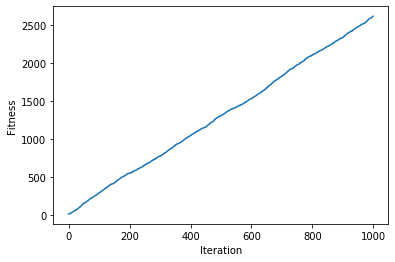

In [8]:

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()
